In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
plt.rcParams['figure.figsize'] = 8, 6

In [5]:
train = pd.read_csv('data/pendigits.tra')
train.head()

,47,100,27,81,57,37,26,0,0.1,23,56,53,100.1,90,40,98,8
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [6]:
train.columns = ['x1','y1','x2','y2','x2','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8','label']
train.head()

,x1,y1,x2,y2,x2,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [7]:
Xtrain = train.drop(['label'], axis=1)
Xtrain.head()

,x1,y1,x2,y2,x2,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20


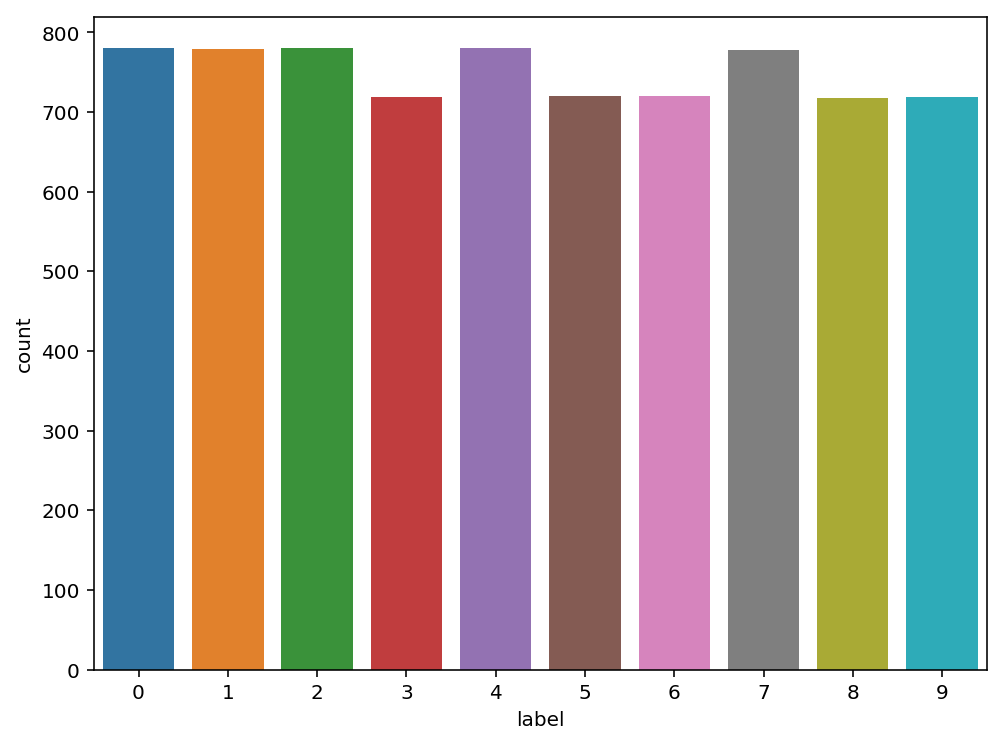

In [8]:
ytrain = train.label
sns.countplot(ytrain)

In [9]:
test = pd.read_csv('data/pendigits.tes')
test.columns = train.columns
Xtest = test.drop(['label'], axis=1)
ytest = test.label
test.head()

,x1,y1,x2,y2,x2,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
1,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
2,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
3,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
4,70,100,100,97,70,81,45,65,30,49,20,33,0,16,0,0,1


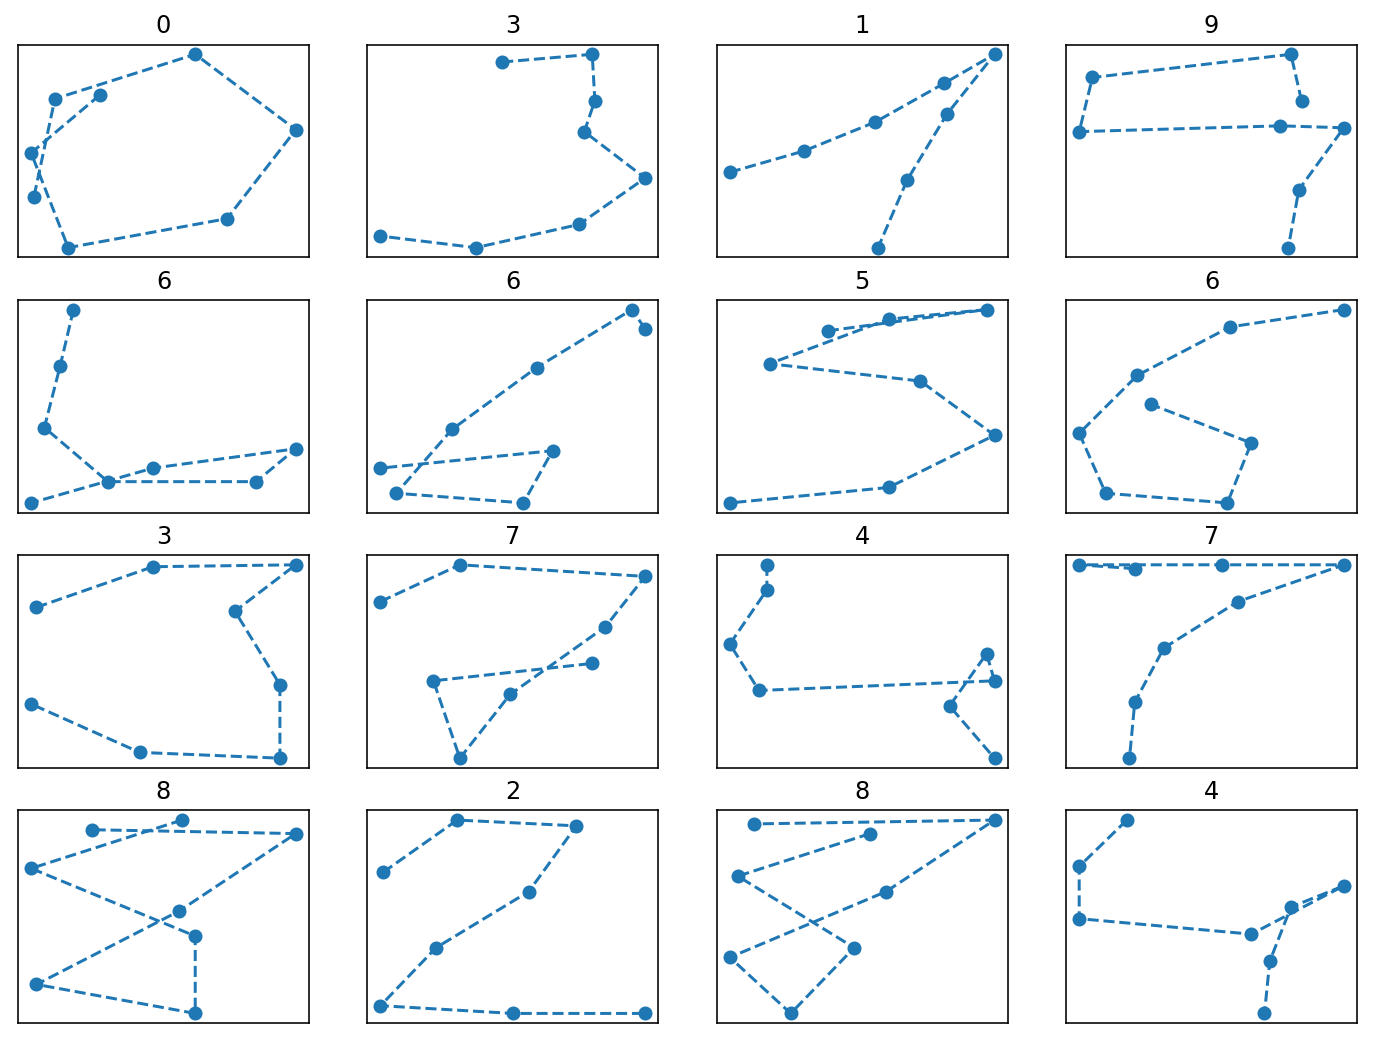

In [10]:
np.random.seed(1)
r, c = 4, 4
ind = np.random.randint(0,Xtrain.shape[0],r*c)
plt.figure(figsize=(12,9))
for i in range(r*c):
    plt.subplot(r,c,i+1)
    p = Xtrain.iloc[ind[i]].values.reshape((8,2))
    plt.plot(p[:,0],p[:,1],'--o')
    plt.title(str(ytrain[ind[i]]))
    plt.xticks([])
    plt.yticks([])

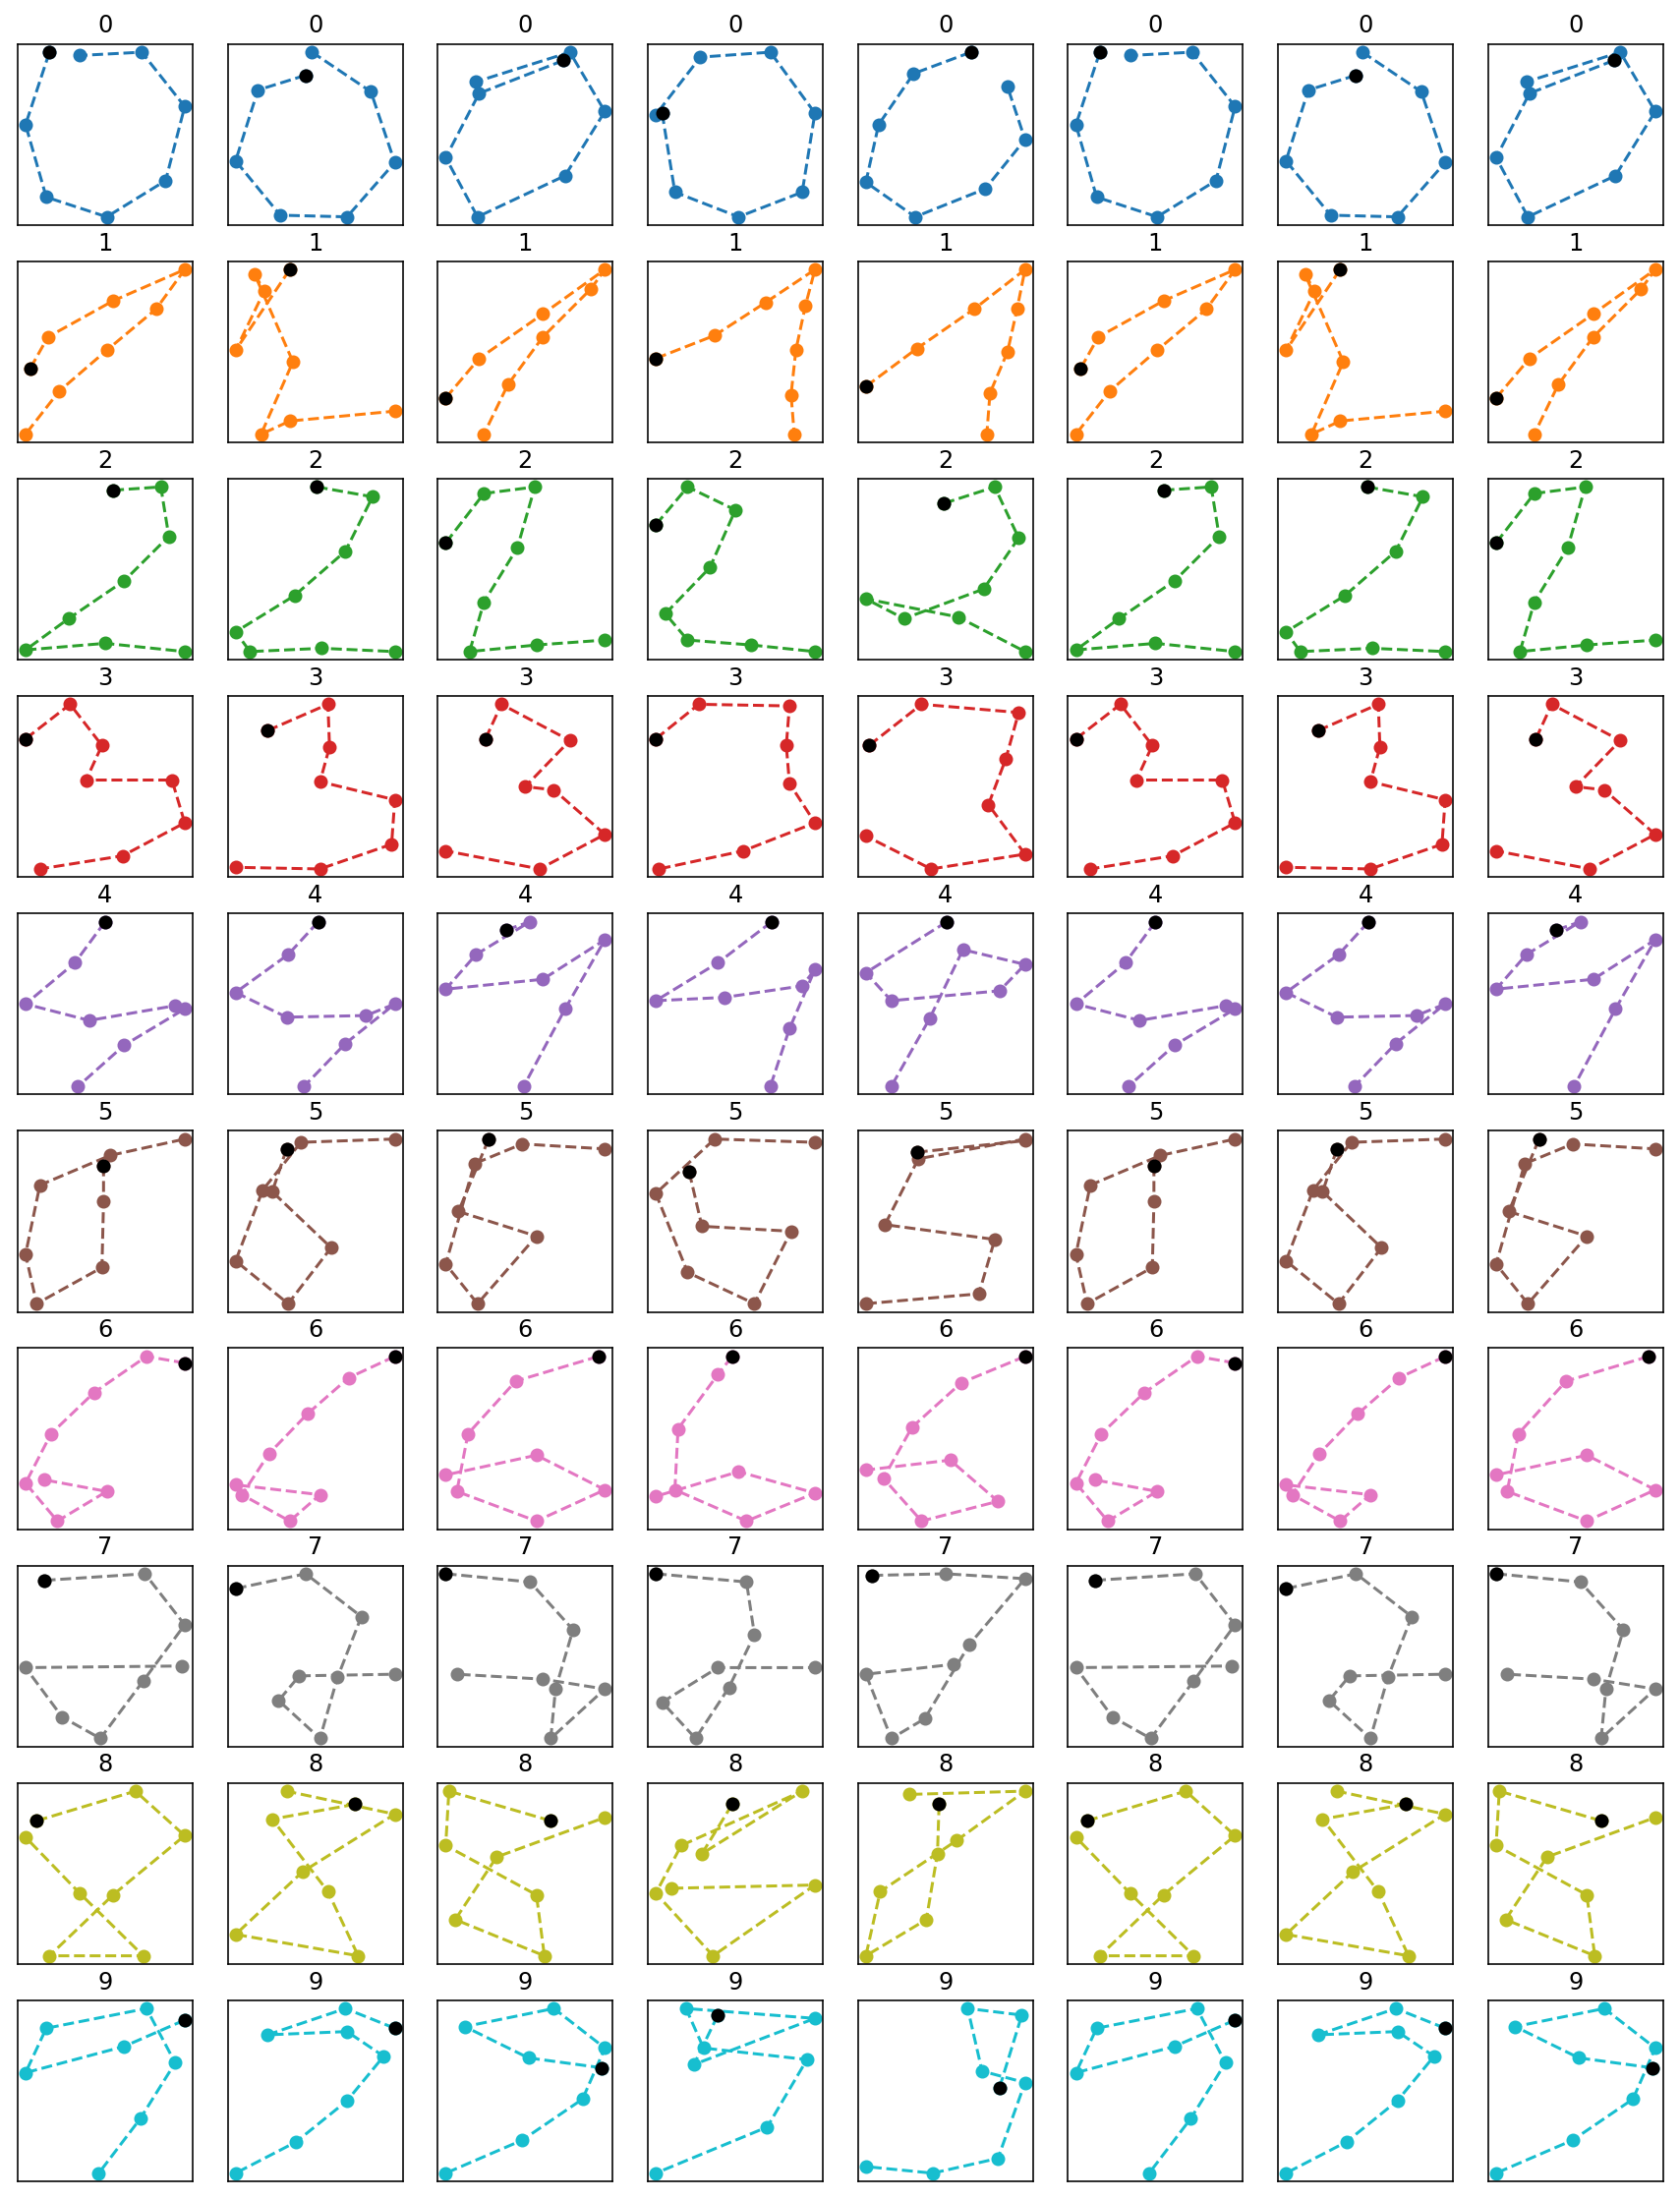

In [11]:
np.random.seed(0)
n_sam = 8
samples = {}
for i in range(10):
    samples[i] = ytrain[ytrain==i].sample(n_sam, replace=False).index
plt.figure(figsize=(15,20))
for i in range(10*n_sam):
    dig, sam = i//n_sam, i%5
    plt.subplot(10,n_sam,i+1)
    p = Xtrain.iloc[samples[dig][sam]].values.reshape((8,2))
    plt.plot(p[:,0],p[:,1],'--o',color=cm.get_cmap('tab10')(dig))
    plt.plot(p[0,0],p[0,1],'ok')
    plt.title(str(ytrain[samples[dig][sam]]))
    plt.xticks([])
    plt.yticks([])

In [12]:
param_grid = {'n_neighbors': range(2,9)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)
grid.cv_results_

{'mean_fit_time': array([0.00820627, 0.00622091, 0.00577464, 0.00576067, 0.00583248,
        0.00609317, 0.00609608]),
 'std_fit_time': array([0.00304381, 0.00065786, 0.00013856, 0.0002792 , 0.00027971,
        0.00071723, 0.00061387]),
 'mean_score_time': array([0.10674176, 0.09314394, 0.09758434, 0.09989467, 0.10795784,
        0.11113486, 0.11405344]),
 'std_score_time': array([0.01674877, 0.00207899, 0.00347723, 0.00250633, 0.0043254 ,
        0.00729138, 0.00344045]),
 'param_n_neighbors': masked_array(data=[2, 3, 4, 5, 6, 7, 8],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8}],
 'split0_test_score': array([0.99133333, 0.992     , 0.99133333, 0.992     , 0.99133333,
        0.99133333, 0.99066667]),
 'split1_test_score': array([0.996     , 0.995333

In [13]:
grid.best_params_

{'n_neighbors': 3}

In [14]:
knn = grid.best_estimator_
print('Train accuracy: {}'.format(knn.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(knn.score(Xtest, ytest)))

Train accuracy: 0.9971973842252769
Test accuracy: 0.9779811266800115


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.96      0.96      0.96       364
           2       0.97      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       0.99      0.97      0.98       364
           5       0.96      0.98      0.97       335
           6       0.98      1.00      0.99       336
           7       0.98      0.96      0.97       364
           8       0.99      0.99      0.99       335
           9       0.98      0.95      0.97       336

   micro avg       0.98      0.98      0.98      3497
   macro avg       0.98      0.98      0.98      3497
weighted avg       0.98      0.98      0.98      3497



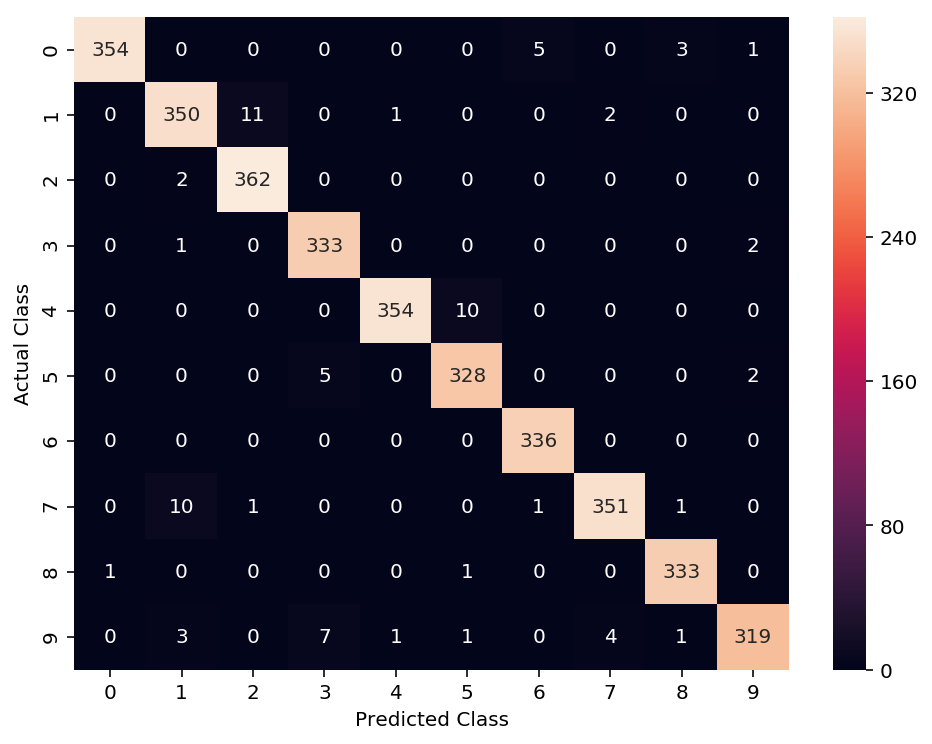

In [15]:
y_pred = knn.predict(Xtest)
print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [16]:
np.random.seed(5)
param_grid = {'max_depth': range(1,20)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)
grid.cv_results_

{'mean_fit_time': array([0.00722003, 0.00975833, 0.01357265, 0.01793494, 0.02770987,
        0.02699032, 0.02945094, 0.03194923, 0.03262553, 0.03415909,
        0.03531065, 0.03575659, 0.03722048, 0.0361845 , 0.03622804,
        0.03633652, 0.0363482 , 0.0370317 , 0.03684359]),
 'std_fit_time': array([1.93882074e-03, 6.14292490e-05, 3.55845569e-04, 8.33969454e-04,
        1.49701929e-03, 5.33502497e-03, 1.36275751e-03, 1.87613518e-03,
        3.38023892e-04, 7.20342029e-04, 6.07759264e-04, 9.33348988e-04,
        1.87968412e-03, 6.45756313e-04, 8.20517401e-04, 5.83851742e-04,
        1.07647557e-03, 1.93604815e-03, 7.80908636e-04]),
 'mean_score_time': array([0.00114684, 0.00119061, 0.00171475, 0.001477  , 0.00178213,
        0.00134959, 0.00160818, 0.00146723, 0.00138726, 0.00137672,
        0.00154119, 0.0013834 , 0.00154138, 0.00138917, 0.00138488,
        0.00135374, 0.00138559, 0.00148149, 0.00137372]),
 'std_score_time': array([1.43793912e-04, 1.01385426e-04, 9.97883165e-04, 2.47

In [17]:
grid.best_params_

{'max_depth': 13}

In [18]:
tree = grid.best_estimator_
print('Train accuracy: {}'.format(tree.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(tree.score(Xtest, ytest)))

Train accuracy: 0.998131589483518
Test accuracy: 0.9213611667143266


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       363
           1       0.88      0.89      0.88       364
           2       0.87      0.95      0.91       364
           3       0.87      0.95      0.91       336
           4       0.93      0.97      0.95       364
           5       0.95      0.84      0.89       335
           6       0.98      0.95      0.96       336
           7       0.95      0.85      0.90       364
           8       0.92      0.95      0.93       335
           9       0.95      0.92      0.93       336

   micro avg       0.92      0.92      0.92      3497
   macro avg       0.92      0.92      0.92      3497
weighted avg       0.92      0.92      0.92      3497



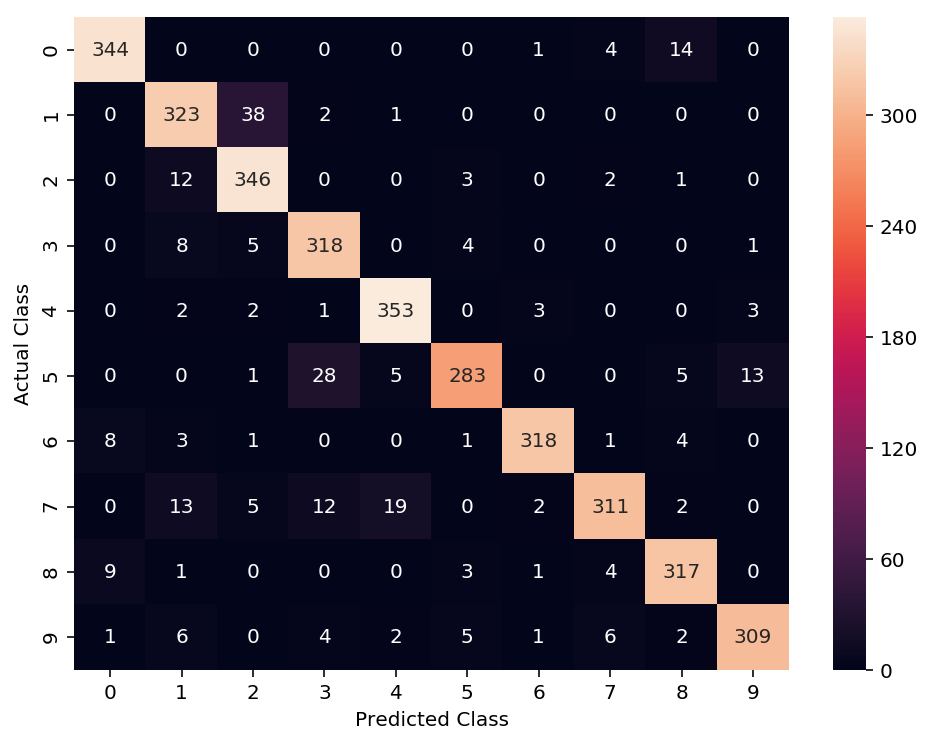

In [19]:
y_pred = tree.predict(Xtest)
print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [20]:
param_grid = {'C':[0.01, 0.1], 'kernel':['linear']}
grid = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)
grid.cv_results_

{'mean_fit_time': array([0.19579549, 0.49800234]),
 'std_fit_time': array([0.00703732, 0.07241876]),
 'mean_score_time': array([0.02037473, 0.01846552]),
 'std_score_time': array([0.00059353, 0.0004437 ]),
 'param_C': masked_array(data=[0.01, 0.1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'linear'}],
 'split0_test_score': array([0.97933333, 0.972     ]),
 'split1_test_score': array([0.986     , 0.98266667]),
 'split2_test_score': array([0.98466667, 0.98266667]),
 'split3_test_score': array([0.98064085, 0.97797063]),
 'split4_test_score': array([0.98795987, 0.98662207]),
 'mean_test_score': array([0.98371814, 0.98038169]),
 'std_test_score': array([0.00324874, 0.00500859]),
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_train

In [21]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [22]:
svm = grid.best_estimator_
print('Train accuracy: {}'.format(svm.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(svm.score(Xtest, ytest)))

Train accuracy: 0.9913252368877619
Test accuracy: 0.9536745782098942


              precision    recall  f1-score   support

           0       0.99      0.91      0.94       363
           1       0.90      0.95      0.93       364
           2       0.96      0.98      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      0.98      0.99       364
           5       0.92      0.98      0.95       335
           6       0.98      0.99      0.98       336
           7       0.98      0.91      0.94       364
           8       0.88      0.92      0.90       335
           9       0.98      0.94      0.96       336

   micro avg       0.95      0.95      0.95      3497
   macro avg       0.95      0.95      0.95      3497
weighted avg       0.96      0.95      0.95      3497



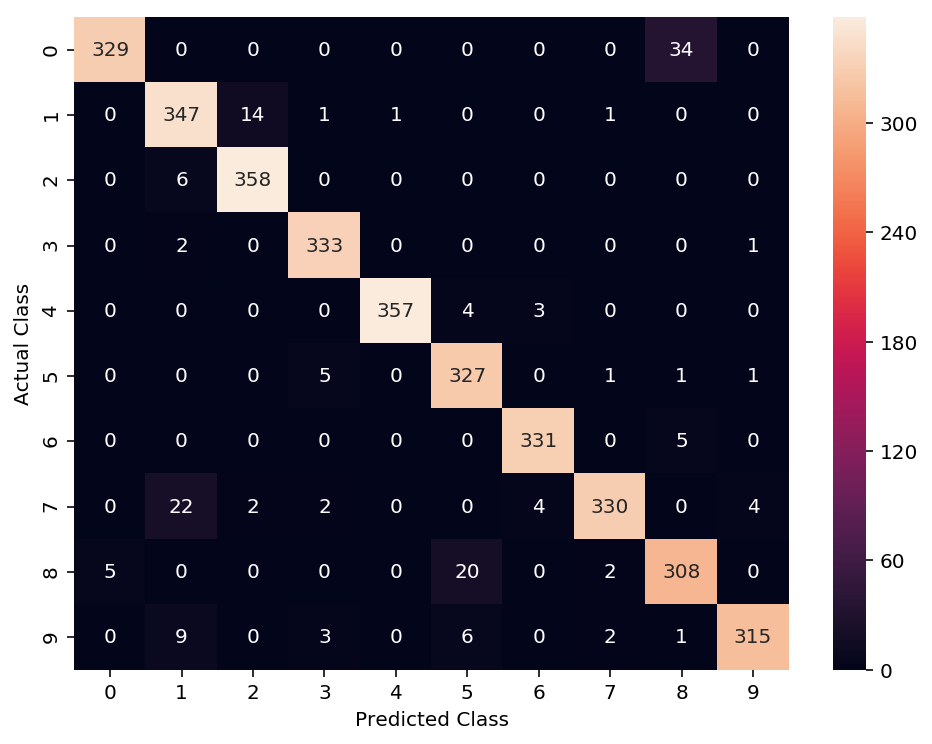

In [23]:
y_pred = svm.predict(Xtest)
print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

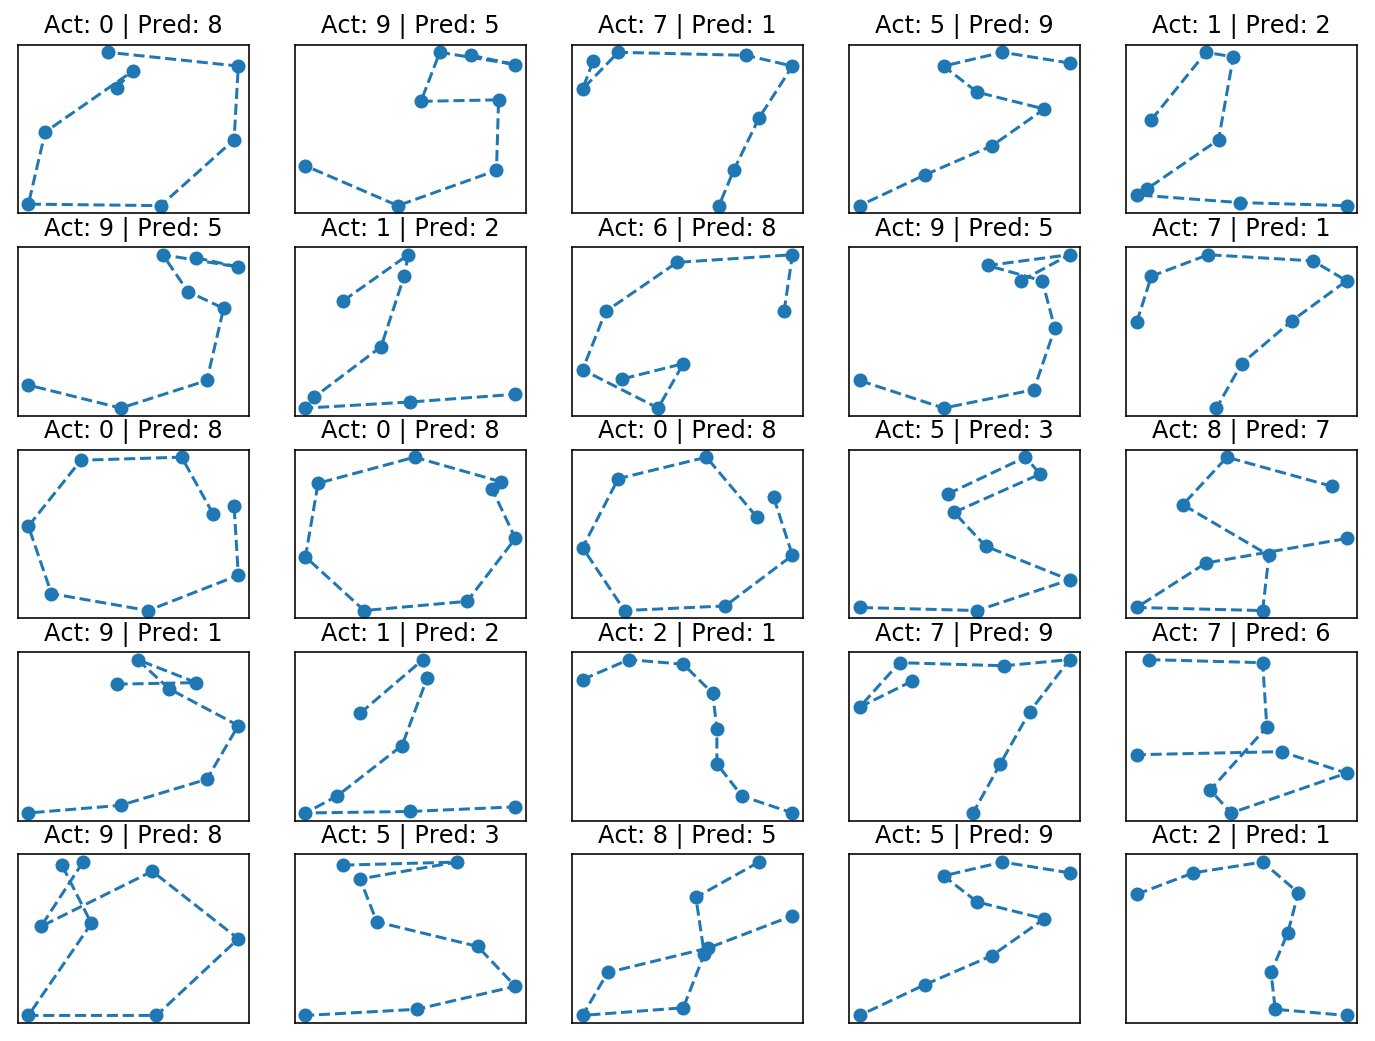

In [24]:
np.random.seed(1)
misclassified = np.where(ytest!=y_pred)[0]
r, c = 5,5
samples = np.random.choice(misclassified, r*c)
plt.figure(figsize=(12,9))
for i in range(r*c):
    plt.subplot(r,c,i+1)
    p = Xtest.iloc[samples[i]].values.reshape((8,2))
    plt.plot(p[:,0],p[:,1],'--o')
    plt.title('Act: '+str(ytest[samples[i]])+' | Pred: '+str(y_pred[samples[i]]))
    plt.xticks([])
    plt.yticks([])